# Importer les librairies

In [40]:
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
# IMPORTER LES LIBRAIRIES NECESSAIRES A L'ETUDE

# Importer les données

In [4]:
filepath = os.getcwd() + "/Data/MK8_Dataset.csv"
data = pd.read_csv(
    filepath,
    delimiter=";"
)

data

,Date,Challenger,Round,Pts,Elo,Rank,Game_phase,Tier,Year,Company,Top_player,Months_after_left_company
0,20211006,Ilir,1,37,1016,2,1-Early,B,2021,Trivadis,1,NaN
1,20211006,Alex,1,27,952,4,1-Early,C,2021,Trivadis,1,-19.0
2,20211006,Sylvain,1,29,984,3,1-Early,C,2021,Trivadis,0,NaN
3,20211006,Sacha,1,54,1048,1,1-Early,S,2021,Trivadis,1,-27.0
4,20211006,Ilir,2,48,1029,2,1-Early,A,2021,Trivadis,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2104,20250410,Alex,11,37,946,3,3-Late,B,2025,Trivadis,1,23.0
2105,20250410,Lev,12,48,1370,1,3-Late,A,2025,Trivadis,1,12.0
2106,20250410,Luca,12,47,1340,2,3-Late,A,2025,Trivadis,1,NaN
2107,20250410,Martin,12,44,1136,3,3-Late,A,2025,Trivadis,1,NaN


# Questions

## 1. Inférence statistique (4 pts)

**Q1: Le score moyen obtenu sur 4 courses est-il significativement différent de 30 points ?**

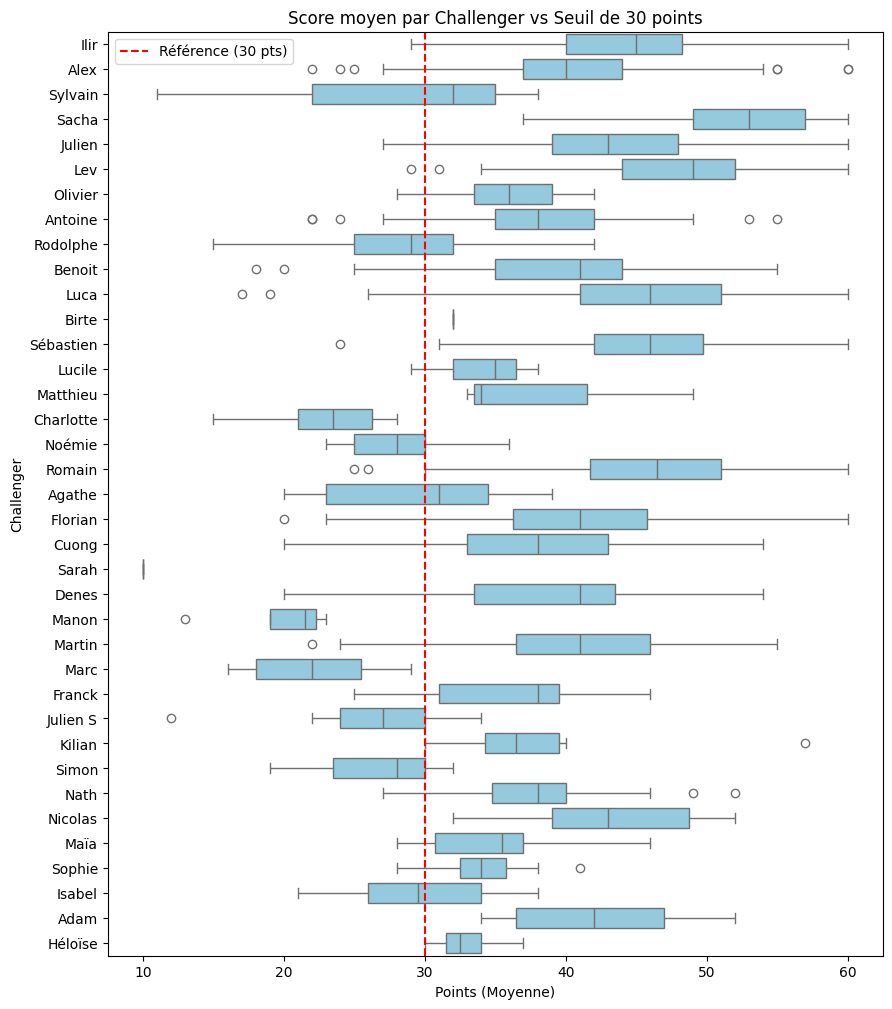

Moyenne globale de tous les challengers : 42.13
le score moyen est significativement supérieur à 30 points, cela suggère que les challengers ont généralement de bonnes performances. Cependant, il est important de noter que la moyenne peut être influencée par des valeurs extrêmes (outliers).
Les variables d'intérêt sont le score moyen -> variable quantitative continue et le challenger -> variable qualitative nominale. Le boxplot est un choix approprié pour visualiser la distribution des scores moyens par challenger, car il permet de voir la médiane, les quartiles et les éventuels outliers pour chaque challenger.


In [ ]:
plt.figure(figsize=(10, 12)) 

sns.boxplot(data=data, x='Pts', y='Challenger', color='skyblue')


plt.axvline(30, color='red', linestyle='--', label='Référence (30 pts)')


plt.title("Score moyen par Challenger vs Seuil de 30 points")
plt.xlabel("Points (Moyenne)")
plt.ylabel("Challenger")
plt.legend()

plt.show()


print(f"Moyenne globale de tous les challengers : {data['Pts'].mean():.2f}")

Moyenne globale de tous les challengers : 42.13
le score moyen est significativement supérieur à 30 points, cela suggère que les challengers ont généralement de bonnes performances. Cependant, il est important de noter que la moyenne peut être influencée par des valeurs extrêmes (outliers).
Les variables d'intérêt sont le score moyen -> variable quantitative continue et le challenger -> variable qualitative nominale. Le boxplot est un choix approprié pour visualiser la distribution des scores moyens par challenger, car il permet de voir la médiane, les quartiles et les éventuels outliers pour chaque challenger.

**Q2: Le score moyen en Pts de Sacha est différent de celui de Lev?**

Challenger
Lev      48.281513
Sacha    52.503356
Name: Pts, dtype: float64


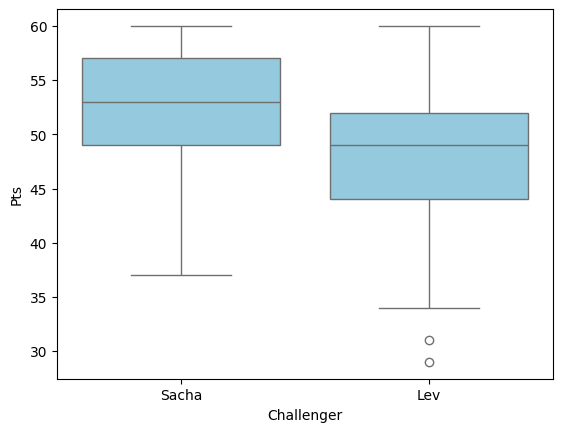

In [31]:
mes_goats = ["Sacha","Lev"]
data_filtre = data[data['Challenger'].isin(mes_goats)]
sns.boxplot(data=data_filtre, x='Challenger', y='Pts', color='skyblue')


moyennes = data_filtre.groupby('Challenger')['Pts'].mean()

print(moyennes)

Sacha a une moyenne de 52.503356 points, tandis que Lev a une moyenne de 48.281513. Cela suggère que Sacha a généralement de meilleures performances que Lev.
Les variables d'intérêt sont le score moyen -> variable quantitative continue et le challenger -> variable qualitative nominale. Le boxplot est un choix approprié pour visualiser la distribution des scores moyens par challenger, car il permet de voir la médiane, les quartiles et les éventuels outliers pour chaque challenger.

**Q3: Est-ce que les joueurs d'Accenture se retrouvent autant dans chaque Tier que les joueurs de Trivadis?**

1. Les deux variables étudiées sont l'entreprise (qualitative nominale) et le tier (qualitative ordinale)
2. Deux variables nominales peuvent être visualisées avec un grouped bar chart, nous avons retiré l'entreprise externe, mis les tier sur l'axe X et la proportion sur l'axe Y 

<Figure size 800x500 with 0 Axes>

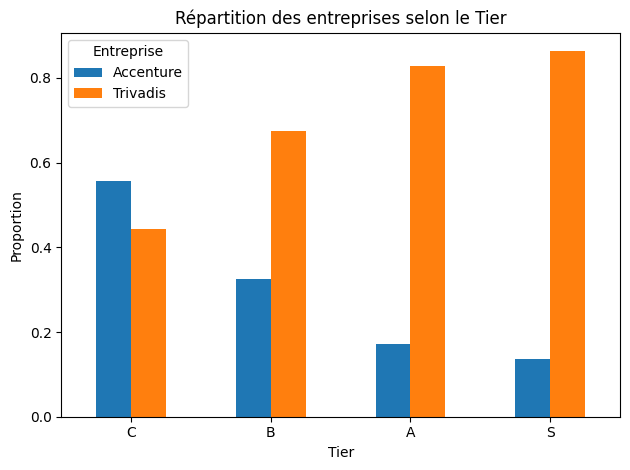

In [ ]:
# Retirer External Company
data = data[data["Company"] != "External Company"]

tier_order = ["C", "B", "A", "S"]
data["Tier"] = pd.Categorical(
    data["Tier"],
    categories=tier_order,
    ordered=True
)


company_order = ["Accenture", "Trivadis"]
data["Company"] = pd.Categorical(
    data["Company"],
    categories=company_order,
    ordered=False
)


contingency_table = pd.crosstab(data["Tier"], data["Company"])


proportions = contingency_table.div(contingency_table.sum(axis=1), axis=0)


plt.figure(figsize=(8,5))
proportions.plot(kind="bar")

plt.title("Répartition des entreprises selon le Tier")
plt.ylabel("Proportion")
plt.xlabel("Tier")
plt.xticks(rotation=0)
plt.legend(title="Entreprise")
plt.tight_layout()
plt.show()

**Q4: Existe-t-il une relation entre les Pts et le score Elo?**

                            OLS Regression Results                            
Dep. Variable:                    Pts   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     1828.
Date:                Sat, 28 Feb 2026   Prob (F-statistic):          4.46e-288
Time:                        14:47:02   Log-Likelihood:                -6934.5
No. Observations:                2109   AIC:                         1.387e+04
Df Residuals:                    2107   BIC:                         1.388e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.6930      0.795     10.937      0.0

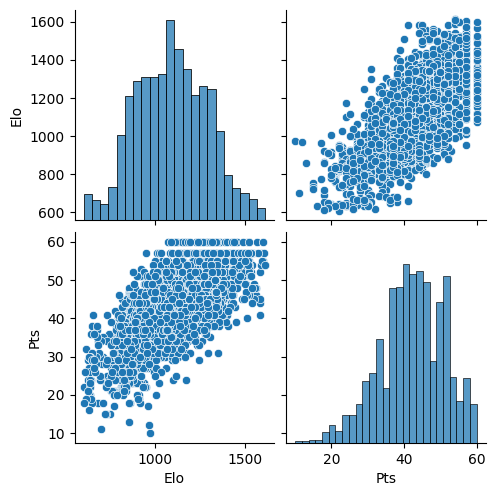

In [45]:
sns.pairplot(
    data=data[["Elo", "Pts"]],
    )

data["Elo"].corr(data["Pts"])

x = data["Elo"]
y = data["Pts"]

model = sm.OLS(
    y,
    sm.add_constant(x)
)
model_fit = model.fit()
print(model_fit.summary())

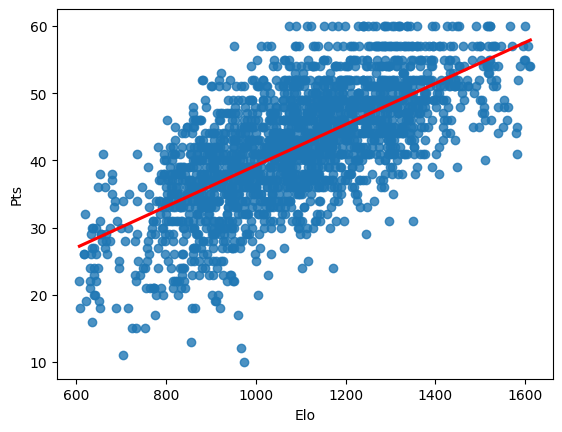

In [44]:
sns.regplot(
    data=data,
    x=x,
    y=y,
    ci=False, # no need for the confidence interval
    line_kws={"color": "red"} # red line
)
plt.show()

**INSTRUCTIONS**

Pour chacune des questions 1 à 4 ci-dessus, argumenter de manière statistique en effectuant chacune des étapes suivantes:
1. Identifier la ou les variables d'intérêt et spécifier le type.
2. Réaliser une visualisation appropriée selon la ou les variables. Interpréter la visualisation.
3. Enoncer une hypothèse nulle et une hypothèse alternative considérant la ou les variables identifiées.
4. Identifier le test statistique approprié selon les hypothèses énoncées.
5. Vérifier la validation des assumptions selon le test identifié.
6. Calculer la statistique ainsi que la p-valeur.
7. Prendre une décision à partir de la p-valeur et d'un seuil alpha de 5%.
8. Interpréter le résultat et évaluer la taille de l'effet.

Quelques liens utiles pour la taille de l'effet:
* [https://rpsychologist.com/cohend/](https://rpsychologist.com/cohend/)
* [https://datatab.net/tutorial/effect-size-independent-t-test](https://datatab.net/tutorial/effect-size-independent-t-test)
* [https://www.simplypsychology.org/effect-size.html](https://www.simplypsychology.org/effect-size.html)

## 2. Data mining (2 pts)

**Q1: Effectuer une analyse statistique à l'aide d'une régression linéaire. Peut-on expliquer le score `Elo` actuel d'un joueur par sa performance du jour (`Pts`), l'inflation des scores avec le temps (les années) et son environnement de travail (`Company`) ?**

**Q2: Effecter une analyse statistique à l'aide d'un arbre de classification avec comme variable dépendante `Tier` et variables indépendantes `Elo`, `Company`, `Game_phase`. Fixer une profondeur maximale de 4. Visualiser l'arbre et expliquer quelques décisions.**